<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
!pip install mplcursors

Import pandas module


In [3]:
import pandas as pd


Import matplotlib


In [4]:
import matplotlib.pyplot as plt


In [5]:
import mplcursors

## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [6]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [7]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [8]:
## Write your code here
df_dup = df[df.duplicated(keep=False)]
print(df_dup.shape[0])
df_dup.head()


40


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [9]:
## Write your code here
subset = ["MainBranch", "Employment", "RemoteWork"]

df_MER = df[df.duplicated(subset=subset, keep=False)].sort_values(subset)

df_MER_analysis = df_MER.groupby(subset).size()
print(df_MER_analysis[df_MER_analysis > 1])

df_MER_sum = df_MER.nunique().sort_values()
print(df_MER_sum)

MainBranch                                                Employment                                                                               RemoteWork                          
I am a developer by profession                            Employed, full-time                                                                      Hybrid (some remote, some in-person)    15288
                                                                                                                                                   In-person                                7118
                                                                                                                                                   Remote                                  12196
                                                          Employed, full-time;Employed, part-time                                                  Hybrid (some remote, some in-person)       78
                                            

In [10]:
df_MER_grouped = df_MER.groupby(['MainBranch', 'Employment', 'RemoteWork'])

# This will return True if everyone in the group has the same value in that column
def all_values_identical(series):
    return series.nunique() == 1
    
# Apply the identical-value check to every column
df_MER_group_identical = df_MER_grouped.agg(all_values_identical)

# Calculate the percentage of groups where each column had identical values
df_MER_group_identical_summary = df_MER_group_identical.mean().sort_values(ascending=False)
df_MER_group_identical_summary[df_MER_group_identical_summary < 1].sort_values(ascending=False).head(10)

ICorPM                           0.304075
AIThreat                         0.275862
SOAccount                        0.266458
AINextLess integrated            0.238245
SurveyLength                     0.235110
AISelect                         0.235110
AINextMuch more integrated       0.231975
SOPartFreq                       0.210031
AINextNo change                  0.210031
AIToolNot interested in Using    0.210031
dtype: float64

In [11]:
#def count_identical_values(group):
#    return (group.nunique() == 1).sum()

#df_MER_analysis = df_MER.groupby(subset).apply(
#    lambda group: pd.Series({
#        'Identical_Columns': count_identical_values(group),
#        'Total_Columns': (len(group.columns)),
#        'Identical_Percentage': (count_identical_values(group) / (len(group.columns)))
#    }),
#    include_groups=False
#).sort_values('Identical_Percentage').reset_index()
#df_MER_analysis.head()

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


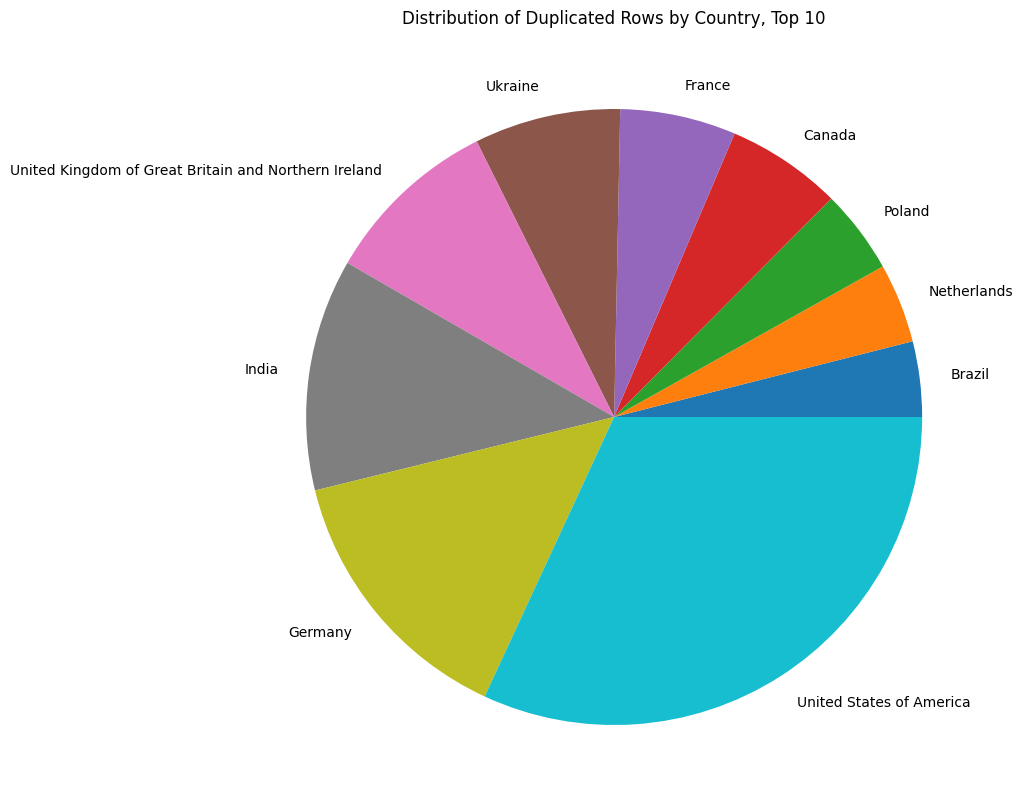

In [12]:
## Write your code here
df_MERC = df_MER[df_MER.duplicated('Country', keep=False).dropna()].sort_values('Country')
df_MERC_sum = df_MERC.groupby("Country").size().sort_values().tail(10)
#print(df_MERC_sum.index)
plt.figure(figsize=(20,10))
df_MERC_sum.plot(kind='pie')
plt.title("Distribution of Duplicated Rows by Country, Top 10")
plt.show()

<Figure size 1000x500 with 0 Axes>

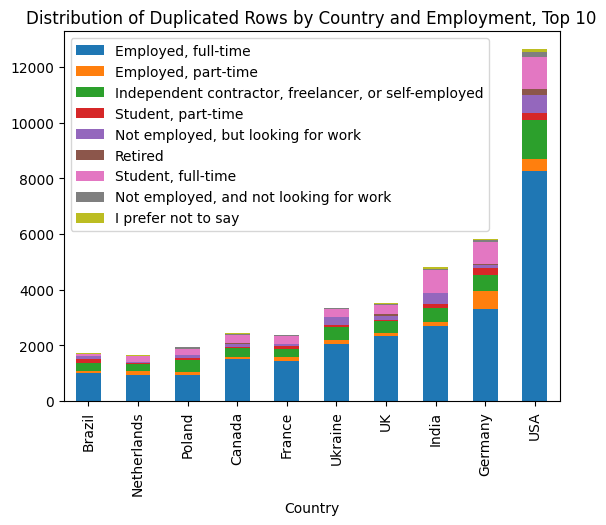

In [13]:
Employment_Type = [
    'Employed, full-time',
    'Employed, part-time',
    'Independent contractor, freelancer, or self-employed',
    'Student, part-time',
    'Not employed, but looking for work',
    'Retired',
    'Student, full-time',
    'Not employed, and not looking for work',
    'I prefer not to say'
]
columns = [
    'Country',
    'Employed, full-time',
    'Employed, part-time',
    'Independent contractor, freelancer, or self-employed',
    'Student, part-time',
    'Not employed, but looking for work',
    'Retired',
    'Student, full-time',
    'Not employed, and not looking for work',
    'I prefer not to say'
]
df_MERCE = df_MER[df_MER.duplicated(['Country', 'Employment'], keep=False).dropna()]
df_MERCE = df_MERCE[['Country', 'Employment']]
df_MERCE_sum = pd.DataFrame(columns=columns)
df_MERCE_sum['Country'] = df_MERC['Country'].unique()
df_MERCE_sum = df_MERCE_sum.set_index('Country')
for country in df_MERCE_sum.index:
    df_country = df_MERCE.loc[df_MERCE['Country'] == country]
    for emp in Employment_Type:
        df_MERCE_sum.at[country, emp] = df_country['Employment'].str.contains(emp).sum()
#print(df_MERCE_sum)

df_MERCE_sum_top10 = df_MERCE_sum.filter(items=df_MERC_sum.index, axis=0)
df_MERCE_sum_top10 = df_MERCE_sum_top10.rename(index={'United Kingdom of Great Britain and Northern Ireland': 'UK', 'United States of America': 'USA'})
plt.figure(figsize=(10, 5))
df_MERCE_sum_top10.plot(kind='bar', stacked=True)
plt.title("Distribution of Duplicated Rows by Country and Employment, Top 10")
plt.xticks(rotation=90)
mplcursors.cursor()
plt.show()

In [14]:
#df_MERC_1 = df_MER['Country'].value_counts().nlargest(10)
#print(df_MERC_1.index)
#plt.figure(figsize=(10,5))
#df_MERC_1.plot(kind='pie')
#plt.title("Distribution of Duplicated Rows by Country, Top 10")
#plt.tight_layout()
#plt.show()

#df_MER_emp_dup = df_MER['Employment'].value_counts()
#plt.figure(figsize=(10, 6))
#df_MER_emp_dup.plot(kind='bar', color='orange')
#plt.title("Distribution of Duplicates by Employment")
#plt.xlabel("Employment Type")
#plt.ylabel("Count")
#plt.xticks(rotation=45)
#plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [15]:
## Write your code here
df_strat_removal = df.drop_duplicates(subset=subset)
print(df_strat_removal.head(5))

   ResponseId                                         MainBranch  \
0           1                     I am a developer by profession   
3           4                              I am learning to code   
4           5                     I am a developer by profession   
5           6                        I code primarily as a hobby   
6           7  I am not primarily a developer, but I write co...   

                  Age           Employment RemoteWork   Check  \
0  Under 18 years old  Employed, full-time     Remote  Apples   
3     18-24 years old   Student, full-time        NaN  Apples   
4     18-24 years old   Student, full-time        NaN  Apples   
5  Under 18 years old   Student, full-time        NaN  Apples   
6     35-44 years old  Employed, full-time     Remote  Apples   

               CodingActivities  \
0                         Hobby   
3                           NaN   
4                           NaN   
5                           NaN   
6  I don’t code outside o

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
